# Credit Card Fraud Detection, Binary Classification

## Outline
- [ 1- Problem Statement](#1)
- [ 2- Packages](#2)
- [ 3- Dataset](#3)
  - [ 3.1 Description of the input data](#3.1)
  - [ 3.2  Data Visualization](#3.2)
  - [ 3.3  Scaling unscaled columns](#3.3)
  - [ 3.4  Splitting the data](#3.4)
- [ 4- Models Implementation](#4)
  - [ 4.1 Logistic Regression](#4.1)
  - [ 4.2 Decision Tree](#4.2)
  - [ 4.3 Random Forest](#4.3)
  - [ 4.4 K-nearest Neighbors](#4.4)
  - [ 4.5 Support Vector Machine](#4.5)
  - [ 4.6 Gaussian Naive Bayes](#4.6)
  - [ 4.7 XGBoost](#4.7)


<a name="1"></a>
### 1- Problem Statement

In this code, various binary classification algorithms are compared to detect credit card fraud. It's essential for credit card companies to recognize fraudulent transactions so that customers are not charged for items that they did not purchase. It's also essential for all merchants to reduce the amount of revenue they lose to fraud.

<a name="2"></a>
### 2 - Packages 

First, let's run the cell below to import some required packages.
- [pandas](https://pandas.pydata.org/) a fast, powerful, flexible and easy to use open source data analysis and manipulation tool.
- [seaborn](https://seaborn.pydata.org/) a Python data visualization library for drawing attractive and informative statistical graphics.
- [matplotlib](http://matplotlib.org) a popular library to plot graphs in Python.
- [sklearn](https://scikit-learn.org/stable/) a simple and efficient tools for predictive data analysis

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,plot_confusion_matrix,accuracy_score

%matplotlib inline

<a name="3"></a>
### 3- Dataset

Start by reading the dataset for this code. 
- The dataset contains credit card transactions labeled as fraudulent or genuine

- The data set contains 284,807 training examples, 492 of them are fraudulent.

- Due to confidentiality issues, the original features and more background information about the data cannot be provided.

  - Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. 

  - Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

  - Feature 'Amount' is the transaction Amount.

  - Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [ ]:
df=pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<a name="3.1"></a>
#### 3.1  Description of the input data

Here we can see that all the columns are normalized except the Time and Amount columns so, we will normalize them *further*.

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


<a name="3.2"></a>
#### 3.2  Data Visualization

3.2.1 Plotting Amount vs Class

- From the plot below we can infer that most of the fraud transactions were done for a relatively lesser amount.
- All the 1s are on the left-hand side of the plot, which means a lesser amount.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


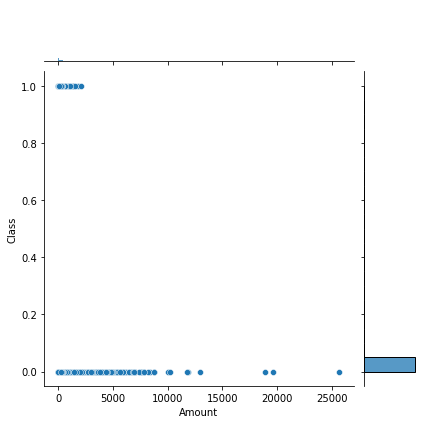

In [ ]:
sns.jointplot(df['Amount'],df['Class'])

3.2.2 Visualizing the unbalanced dataset

- From the plot below, we can infer that the dataset is highly unbalanced - 284315 non-fraudulent and 492 fraudulent transactions.
- The models when trained on this data will give 99% accuracy because they will simply predict non-fraudulent every time and hence they will be proven as very bad models.
-To tackle this we need to balance our dataset.

In [ ]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


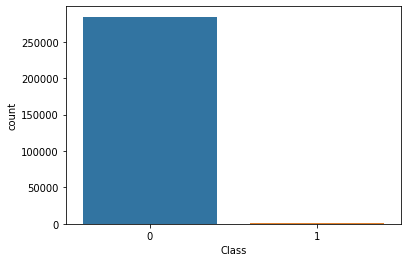

In [ ]:
sns.countplot(df['Class'])

Balancing dataset for Credit Card Fraud Detection

In [ ]:
non_fraud = df[df['Class']==0]
fraud = df[df['Class']==1]

non_fraud = non_fraud.sample(frac=1)

non_fraud = non_fraud[:492]

new_df = pd.concat([non_fraud,fraud])
new_df = new_df.sample(frac=1)

3.2.3 Visualizing the balanced dataset

- From the plot below, we can see that our dataset is balanced - both classes have 492 instances each.

In [ ]:
new_df['Class'].value_counts()

0    492
1    492
Name: Class, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


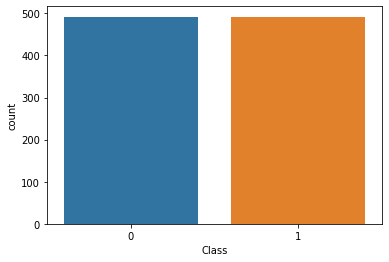

In [ ]:
sns.countplot(new_df['Class'])

<a name="3.3"></a>
#### 3.3 Scaling unscaled columns

In [ ]:
from sklearn.preprocessing import RobustScaler

rbs = RobustScaler()

df_small = df[['Time','Amount']]
df_small = pd.DataFrame(rbs.fit_transform(df_small))

df_small.columns = ['scaled_time','scaled_amount']
df = pd.concat([df,df_small],axis=1)

df.drop(['Time','Amount'],axis=1,inplace=True)

df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,scaled_time,scaled_amount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,-0.994983,1.783274
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.994983,-0.269825
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,-0.994972,4.983721
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,-0.994972,1.418291
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.994960,0.670579


<a name="3.4"></a>
#### 3.4 Splitting the data into train-test-split

In [ ]:
X = new_df.drop('Class',axis=1)
y = new_df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=101)

<a name="4"></a>
### 4- Models Implementation

We are comparing the accuracy of the following models in detecting credit card fraud:
- Logistic Regression
- Decision Tree
- Random Forest
- K-nearest Neighbors
- Support Vector Machine
- Guassian Naive Bayes
- XGBoost

<a name="4.1"></a>
#### 4.1 Logistic Regression

              precision    recall  f1-score   support

           0       0.93      0.97      0.95       103
           1       0.97      0.93      0.95        94

    accuracy                           0.95       197
   macro avg       0.95      0.95      0.95       197
weighted avg       0.95      0.95      0.95       197



accuracy is -->  94.92





/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


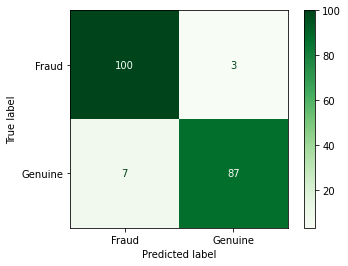

In [ ]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train,y_train)

pred = lr.predict(X_test)

print(classification_report(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
print('\n\n')
plot_confusion_matrix(lr, X_test, y_test, display_labels=['Fraud', 'Genuine'], cmap='Greens', xticks_rotation='horizontal')
plt.grid(False)

<a name="4.2"></a>
#### 4.2 Decision Tree

              precision    recall  f1-score   support

           0       0.95      0.92      0.94       103
           1       0.92      0.95      0.93        94

    accuracy                           0.93       197
   macro avg       0.93      0.93      0.93       197
weighted avg       0.93      0.93      0.93       197



accuracy is -->  93.4





/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


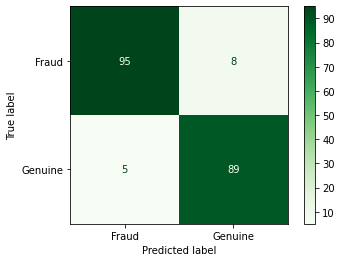

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

pred = dt.predict(X_test)

print(classification_report(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
print('\n\n')
plot_confusion_matrix(dt, X_test, y_test, display_labels=['Fraud', 'Genuine'], cmap='Greens', xticks_rotation='horizontal')
plt.grid(False)

<a name="4.3"></a>
#### 4.3 Random Forest

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       103
           1       0.98      0.94      0.96        94

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



accuracy is -->  95.94





/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


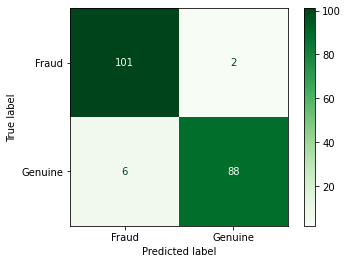

In [ ]:
from sklearn.ensemble import RandomForestClassifier,IsolationForest

rf = RandomForestClassifier(n_estimators=100)
rf.fit(X_train,y_train)

pred = rf.predict(X_test)

print(classification_report(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
print('\n\n')
plot_confusion_matrix(rf, X_test, y_test, display_labels=['Fraud', 'Genuine'], cmap='Greens', xticks_rotation='horizontal')
plt.grid(False)

<a name="4.4"></a>
#### 4.4 K-nearest Neighbors

              precision    recall  f1-score   support

           0       0.67      0.68      0.68       103
           1       0.65      0.64      0.64        94

    accuracy                           0.66       197
   macro avg       0.66      0.66      0.66       197
weighted avg       0.66      0.66      0.66       197



accuracy is -->  65.99





/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


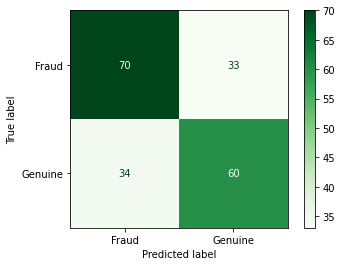

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print(classification_report(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
print('\n\n')
plot_confusion_matrix(knn, X_test, y_test, display_labels=['Fraud', 'Genuine'], cmap='Greens', xticks_rotation='horizontal')
plt.grid(False)

<a name="4.5"></a>
#### 4.5 Support Vector Machine

              precision    recall  f1-score   support

           0       0.60      0.70      0.65       103
           1       0.60      0.49      0.54        94

    accuracy                           0.60       197
   macro avg       0.60      0.59      0.59       197
weighted avg       0.60      0.60      0.59       197



accuracy is -->  59.9





/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


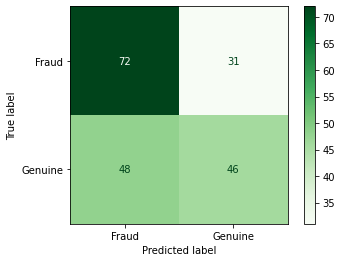

In [ ]:
from sklearn.svm import SVC

svm = SVC()
svm.fit(X_train, y_train)

pred = svm.predict(X_test)

print(classification_report(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
print('\n\n')
plot_confusion_matrix(svm, X_test, y_test, display_labels=['Fraud', 'Genuine'], cmap='Greens', xticks_rotation='horizontal')
plt.grid(False)

<a name="4.6"></a>
#### 4.6 Guassian Naive Bayes

              precision    recall  f1-score   support

           0       0.87      0.98      0.92       103
           1       0.98      0.84      0.90        94

    accuracy                           0.91       197
   macro avg       0.92      0.91      0.91       197
weighted avg       0.92      0.91      0.91       197



accuracy is -->  91.37





/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


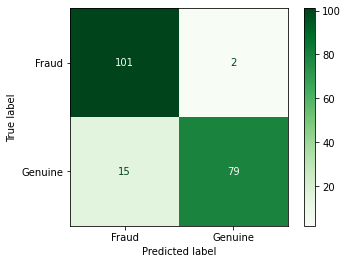

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

pred = gnb.predict(X_test)

print(classification_report(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
print('\n\n')
plot_confusion_matrix(gnb, X_test, y_test, display_labels=['Fraud', 'Genuine'], cmap='Greens', xticks_rotation='horizontal')
plt.grid(False)

<a name="4.7"></a>
#### 4.7 XGBoost

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       103
           1       0.98      0.94      0.96        94

    accuracy                           0.96       197
   macro avg       0.96      0.96      0.96       197
weighted avg       0.96      0.96      0.96       197



accuracy is -->  95.94





/usr/local/lib/python3.8/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


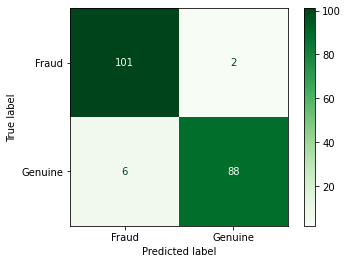

In [ ]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(X_train, y_train)

pred = xgb.predict(X_test)

print(classification_report(y_test,pred))
print('\n')
print('accuracy is --> ',round(accuracy_score(y_test,pred)*100,2))
print('\n\n')
plot_confusion_matrix(xgb, X_test, y_test, display_labels=['Fraud', 'Genuine'], cmap='Greens', xticks_rotation='horizontal')
plt.grid(False)